<a href="https://colab.research.google.com/github/Aashi779/ML-Projects/blob/main/LogisticRegression_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

In [ ]:
import pandas as pd
import pandas.util.testing as tm # although this is optional
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/framingham.csv'
heart_df = pd.read_csv(url)
heart_df.drop(['education'], axis=1, inplace= True)
heart_df.head()
# In this the recorded ages have been truncated to whole numbers but the concept of age is continuous
# number of cigarretts is considered to be continuous
# BPmeds is wehter the patient is on blood pressure medication 
# prevalentHyp wehter or not the patient was hypertensive
# sysBP: systolic blood pressure (Continuous)
# diaBP: diastolic blood pressure (Continuous)
# heartRate is in fact discrete but here considered continuous 

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
heart_df.rename(columns = {'male':'Gender_male'}, inplace = True)

In [ ]:
heart_df.isnull().sum() 
# giving total number of rows in a particular value giving null values. 

Gender_male          0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
count = 0
for i in heart_df.isnull().sum(axis=1):
  if(i>0):
    count = count +1
print('Total number of rows with missing values is ', count) 
print('since it is only', round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')   

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [ ]:
heart_df.dropna(axis=0, inplace=True)
# It removes the rows that contains null values

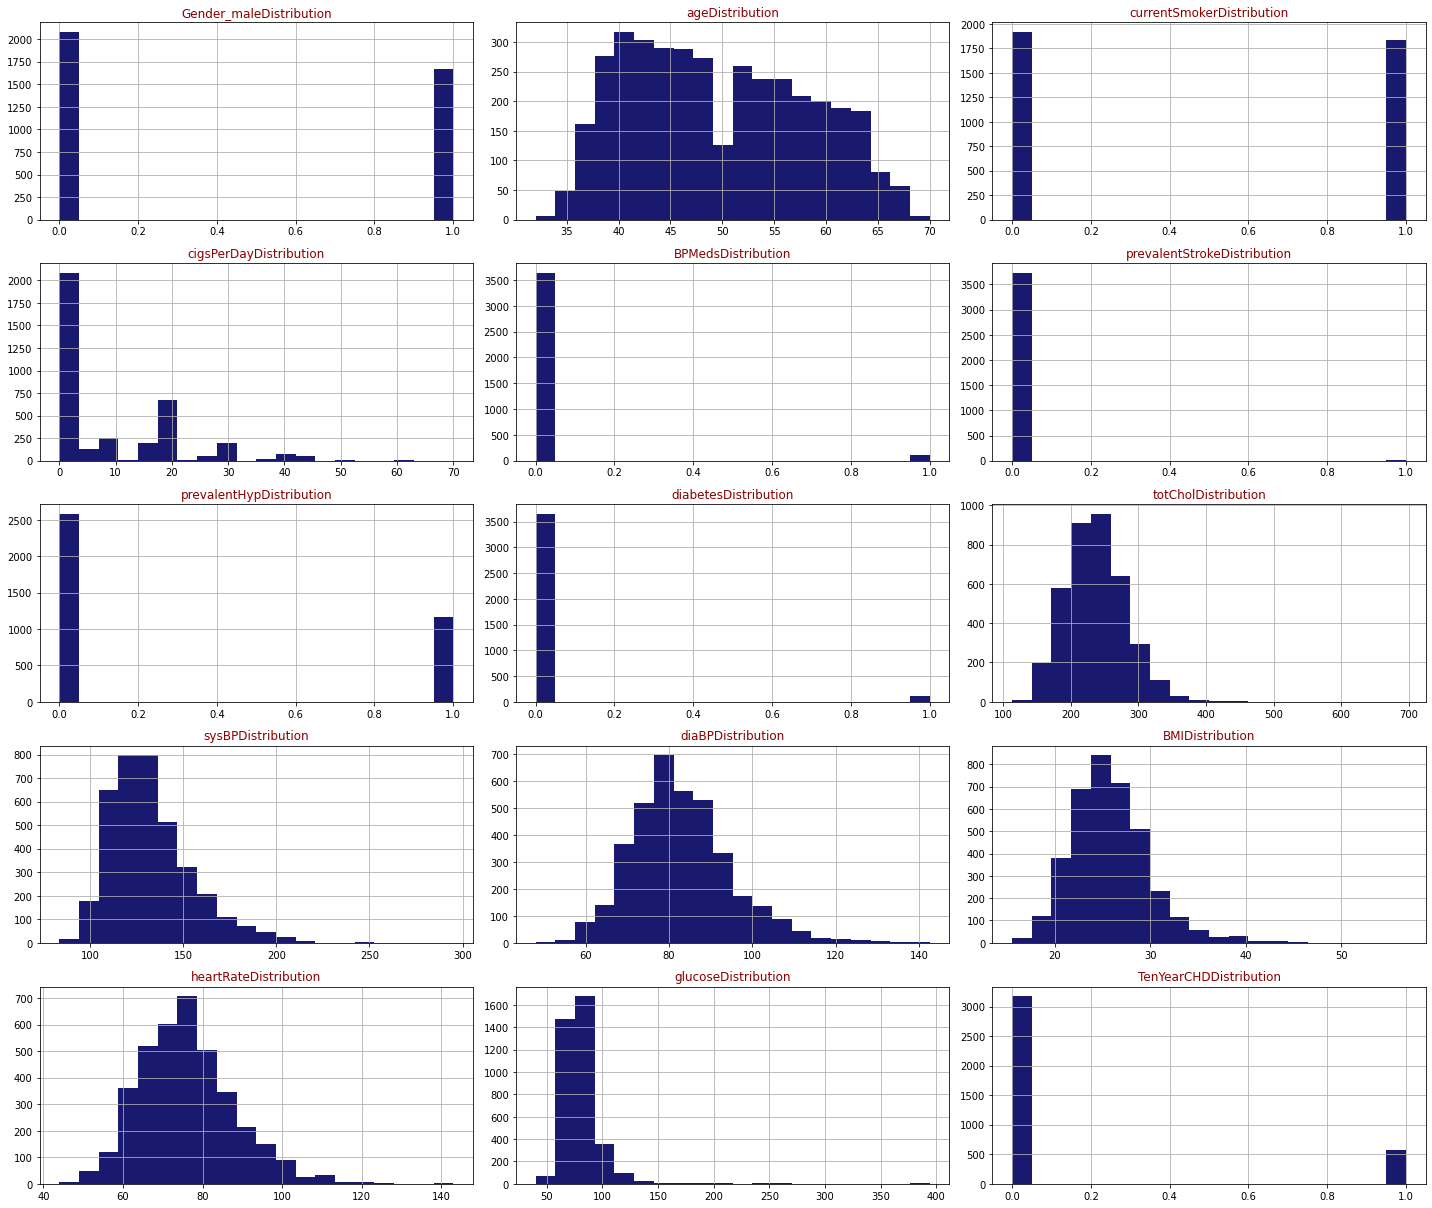

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
  fig=plt.figure(figsize = (20,20))
  for i, feature in enumerate(features):
    ax=fig.add_subplot(rows,cols,i+1)
    dataframe[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
    ax.set_title(feature +"Distribution", color = 'DarkRed')
  fig.tight_layout()
  plt.show()
draw_histograms(heart_df, heart_df.columns, 6,3)

In [ ]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

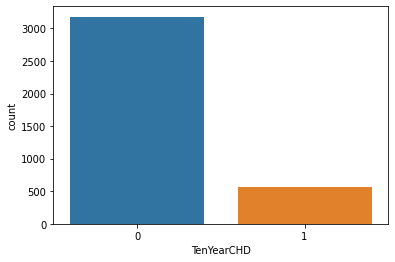

In [ ]:
sn.countplot(x='TenYearCHD', data=heart_df)
plt.show()
# There are 3179 patients with no heart disease and 572 patients with risk of heart disease

In [ ]:
heart_df.describe()

,Gender_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


LOGISTIC REGRESSION
It is used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.  
It is used to solve a binary classification problem. Each having 2 classes like email(spam/not spam).
Also linear regression cannot be used since it is used when we have continuous values unlike logistic regression where values are dicrete.

In [ ]:
#IMPLEMENT LINEAR EQUATION
# Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value.
# Sigmoid function - used in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.